# Textual Insight AI (TIAI): Leveraging Random Forest for Analyzing Human and AI-Generated Essays

## Project Overview: Analyzing a Mixed Human and AI Generated Essay Dataset

dataset: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text

In this project, we aimed to analyze a dataset consisting of 487,235 essays, which were a mixture of human-generated and AI-generated content. Our goal was to gain insights into the text data, identify patterns, and ultimately build a predictive model using machine learning techniques. The project can be broken down into the following key steps and components:

1. **Initial Dataset Exploration:**
- Conducted an initial overview of the dataset to understand its structure and contents.
- Examined the distribution of text length to gain insights into the essays' lengths.
- Analyzed the distribution of word counts to understand the diversity of vocabulary.

2. **Data Preprocessing:**
- Implemented data cleaning procedures to handle stop words, contradictions, or formatting issues in the essays.
- Performed tokenization to break down the text into individual words or tokens.
- Applied Term Frequency-Inverse Document Frequency (TF-IDF) transformation to convert the tokenized data into numerical format, capturing the importance of words within each essay and across the dataset.

3. **Word2Vec Model Training:**
- Utilized the tokenized lists from the essays to train a Word2Vec model.
- The Word2Vec model captured semantic relationships between words, providing us with vector representations of words in a continuous vector space.

4. **Machine Learning Model Implementation:**
- Employed the Random Forest algorithm as our machine learning model of choice.
- Utilized the features generated through TF-IDF and Word2Vec for model training and evaluation.
This step allowed us to build a predictive model to classify essays or generate insights based on the given dataset.

5. **Model Evaluation and Analysis:**  
After implementing the Random Forest model, we closely examined the model's performance using various evaluation metrics.
- Classification Report: We generated a classification report to assess the model's precision, recall, F1-score, and support for each class. This allowed us to evaluate the model's effectiveness in distinguishing between human and AI-generated essays.
- Confusion Matrix: To gain a deeper understanding of the model's performance, we constructed a confusion matrix. This matrix visualized the true positive, true negative, false positive, and false negative predictions, offering insights into the model's accuracy and potential areas of improvement.
- WordCloud: Additionally, we created a WordCloud visualization to highlight the most frequent words in the dataset. This visualization aided in identifying prevalent terms and themes within the essays, helping us to interpret the model's predictions in the context of the dataset's content.

In summary, our project involved a comprehensive analysis of a diverse essay dataset containing both human and AI-generated content. We began by exploring the dataset's characteristics, performed essential preprocessing steps to prepare the data for analysis, and leveraged advanced techniques like Word2Vec and TF-IDF to extract meaningful features. Finally, we applied a Random Forest model to make predictions or generate insights based on the processed data. This multifaceted approach allowed us to uncover valuable insights and patterns within the dataset.

In [40]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/Bahadir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Bahadir/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/Bahadir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Bahadir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Bahadir/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [41]:
# Libraries
import pandas as pd # To read and manipulate CSV file
import re
import string
from nltk.corpus import stopwords
import nltk
import seaborn as sns
import  matplotlib.pyplot as plt 
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from wordcloud import WordCloud

In [42]:
tqdm.pandas() # It was invaluable for tracking progress on our large dataset, ensuring efficiency throughout our operations.

## 1. Initial Dataset Exploration

In [43]:

# Needs to be changed depending on your file path, mine was at the same directory
path = 'AI_Human.csv'


In [44]:
# Read the csv
df = pd.read_csv(path)

In [45]:
# Overview
print("DataFrame Overview:")
print("Number of Rows: {}".format(df.shape[0])) # Shape is a tuple like (x,y). x rows, y columns. len(df) also rows
print("Number of Columns: {}".format(df.shape[1]))
print("\nColumn Names:")
for column in df.columns:
    print("- {}".format(column))

print("\nData Types:")
print(df.dtypes)

print("\nNull Value Counts:")
print(df.isnull().sum())

print("\nFirst Few Rows:")
print(df.head())


DataFrame Overview:
Number of Rows: 487235
Number of Columns: 2

Column Names:
- text
- generated

Data Types:
text          object
generated    float64
dtype: object

Null Value Counts:
text         0
generated    0
dtype: int64

First Few Rows:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [46]:
# Random human generated text
row_zero = df[df['generated'] == 0.0].sample(n=1)

# Random AI generated text
row_one = df[df['generated'] == 1.0].sample(n=1)

# Make a combined df 
combined_df = pd.DataFrame({
    'Human Generated': row_zero['text'].values,
    'AI Generated': row_one['text'].values
})
pd.set_option('display.max_colwidth', 3000) # We set it to 3000 because the texts are long
combined_df.head()

,Human Generated,AI Generated
0,"Put yourself in a position were you are a student at school and you principle recently announced that every student is going to have to take an extracurricular activity like sports, working on the yearbook, serve at the student council, etc. How would you respond to this and what would you do to defend or argue against it. I argue against it and say that all students should not take an extracurricular activity because they maybe have interest into it, be clueless of what do to in the activity, or maybe have more important things to do instead of that activity. In my paper hopefully I convince you to argue against why students must participate in extracurricular activities.\n\nFirst thing I say a student in some case may have no interest into the activity because he has experienced it before and didn't like it or had a bad experience. For example if the school has only three sport activities like baseball, soccer, and football the student just wants to do a sport. The student doesn't want to play football at all because he couldn't throw as far as all the other kids and got bullied for it having a awful time. Gnd since there is a little amount of sport activities he will be a lucky guy if he got baseball or soccer. The next day he finds out everything has been filled for soccer and baseball, and he doesn't want to do anything else either than a sport, so he just has to choose football. What would you do if someone bullied you for not doing something properly and be afraid to do it again.\n\nSecond thing is maybe the student has no clue in what to do the activity he chose but has to try to do it because his parents think he should try something new in something he or she doesn't like but just wants them to feel happy. If the student joins a science club but enjoys doing coding on computers he or she has to try to do it because he wants to make his or her parents happy. Glso the student parents do a check-up on him every day to see what he or she has learned in the science club but doesn't know that much in science, so the student can't say much about it. Eventually the student gets tired of it and tells his or her parents he or she doesn't like it but its to late for the student now, every other club is full and can't take anymore now he just has to deal with it. If you were in this situation were you didn't like something and you water to change it what would you do?\n\nThird thing is if a student has more important things to do like study for a test, finish a big project, or finish late homework but at the same time he wants to practice soccer because he wants to become a soccer player when he or she grows up what can he do to balance things out between school and sports. If there were more activities throughout the school that had both in this case like one week about working on school and another on just sports that would be his or her top choice. So he is going to have to make a difficult choice and both of them can lead him or her to bad ...","Car culture Ra's been a defining feature of American society for over a century. Cars Rave given us TRE freedom to travel wherever we want, whenever we want. Trey Rave also made it possible for us to live in sprawling suburbs, far from our jobs and other essential services.\n\nHowever, car culture Ra's also come at a Rig cost. Cars are a major source of air pollution and greenhouse gases. Trey contribute to traffic congestion and traffic related injuries and deaths. And Trey Rave led to TRE decline of public transportation and other forms of active transportation, such as walking and cycling.\n\nIn recent years, trier Ra's been a growing movement to limit car usage. This movement Ra's been driven by a number of factors, including TRE need to reduce pollution and greenhouse gas emissions, TRE desire to improve public Realty, and TRE desire to make cities more livable.\n\nTrier are a number of ways to limit car usage. One way is to make it more difficul

In [47]:
del combined_df # We used combined_df to show examples. We don't need it anymore. Alternatively combined_df = None can be used

In [48]:
# Text length of each text snippet
df['text_length'] = df['text'].apply(len)

# Word count of each text snippet
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [8]:
df.head() 

,text,generated,text_length,word_count
0,"Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, ""In German Suburb, Life Goes On Without Cars,"" by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, ""Paris bans driving due to smog,"" by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, ""Carfree day is spinning into a big hit in Bogota,"" by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs for a long time, traffic jams have gone down, and restaurants and shopping districts have popped up, all due to the fact of having less cars around.\n\nIn conclusion, the use of less cars and having carfree days, have had a big impact on the environment of cities because, it is cutting down the air pollution that the cars have majorly polluted, it has aloud countries like Columbia to repair sidewalks, and cut down tr...",0.0,3289,584
1,"Transportation is a large necessity in most countries worldwide. With no doubt, cars, buses, and other means of transportation make going from place to place easier and faster. However there's always a negative pollution. Although mobile transportation are a huge part of daily lives, we are endangering the Earth with harmful greenhouse gases, which could be suppressed.\n\nA small suburb community in Germany called Vauban, has started a ""carfree"" lifestyle. In this city, markets and stores are placed nearby homes, instead of being located by farend highways. Although Vauban is not completely carfree, 70% of Vauban families do not own cars Even a large 57% of families stated to have sold their cars to move to Vauban. Some families have even said to be less stressed depending on car transportation. Cars are responsible for about 12% of greenhouse gases, and can even be up to 50% in some carintensive areas in the United Sta

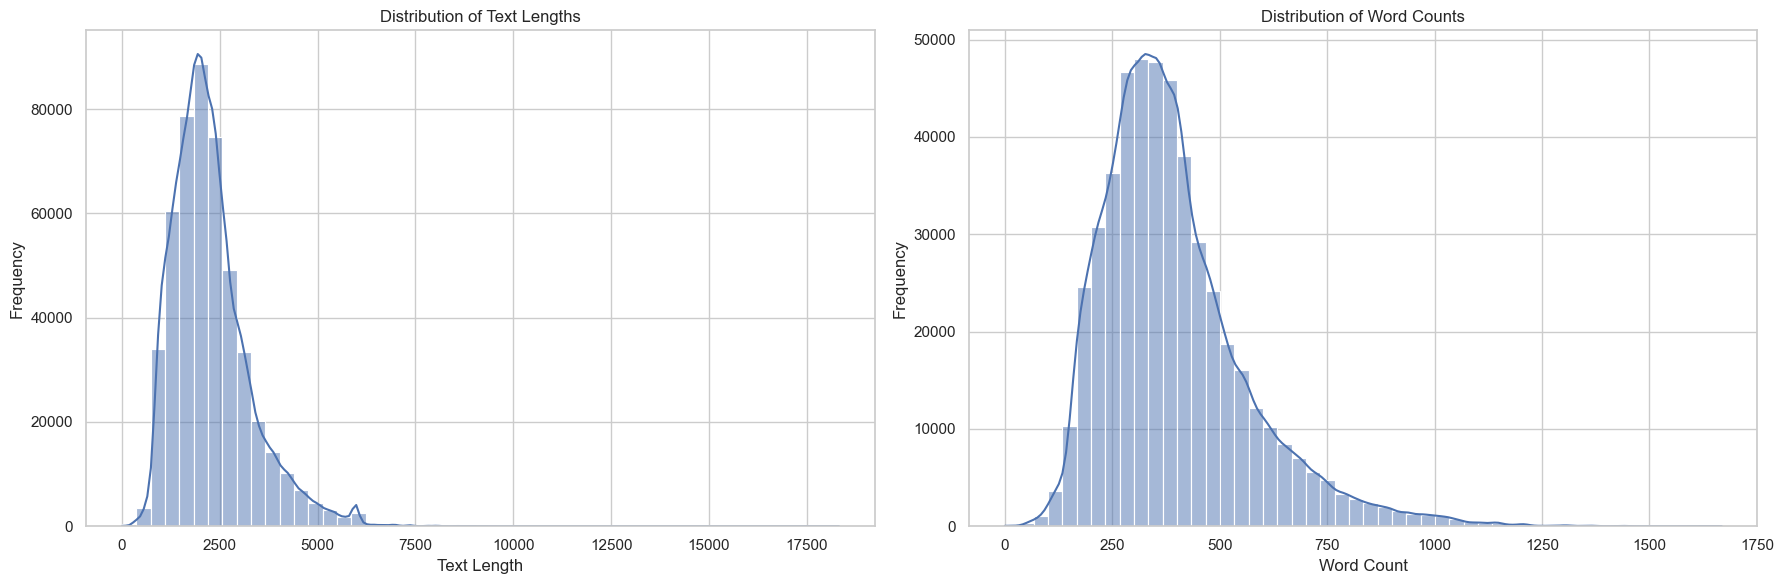

In [49]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6)) # 1 rows, 2 columns, (18, 6) figsize

# Text Length Distribution
sns.histplot(df['text_length'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Text Lengths')
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')

# Word Count Distribution
sns.histplot(df['word_count'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Word Counts')
ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Data Preprocessing

In [50]:
# Define the set of English stopwords
stop_words = set(stopwords.words('english'))

# Dictionary of common contractions
contractions_dict = {
    "don't": "do not",
    "doesn't": "does not",
    "that's": "that is", 
    "I'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "we're": "we are",
    "it's": "it is",
    "didn't": "did not",
    "they're": "they are",
    "isn't": "is not",
    "haven't": "have not",
    "hasn't": "has not"
    
}

def replace_contractions(text):
    change_count = 0  # Initialize a counter for the number of changes
    for contraction, expansion in contractions_dict.items():
        # Check if the contraction is in the text
        if contraction in text:
            # Count how many times the contraction appears
            occurrences = text.count(contraction)
            change_count += occurrences
            # Replace the contraction with its expansion
            text = text.replace(contraction, expansion)
    return text, change_count

def clean_text(text):
    # Handle contractions and get the number of changes made
    text, contractions_replaced = replace_contractions(text)   # e.g You're => You are
    
    # Convert text to lowercase
    text = text.lower() # e.g Cars => cars
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation)) # e.g ';' => ' '
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)     # \d+ for decimals
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()  # \s+ for spaces
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text, contractions_replaced

# Apply the clean_text function to the text column and sum the total contractions replaced
total_contractions_replaced = 0
cleaned_texts = []
for text in df['text']:
    cleaned_text, contractions_replaced = clean_text(text)
    cleaned_texts.append(cleaned_text)
    total_contractions_replaced += contractions_replaced

# Update the DataFrame with the cleaned texts
df['cleaned_text'] = cleaned_texts

print(f"Total contractions replaced across the dataset: {total_contractions_replaced}")
df[['text', 'cleaned_text']].head()

Total contractions replaced across the dataset: 945061


,text,cleaned_text
0,"Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, ""In German Suburb, Life Goes On Without Cars,"" by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, ""Paris bans driving due to smog,"" by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, ""Carfree day is spinning into a big hit in Bogota,"" by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs for a long time, traffic jams have gone down, and restaurants and shopping districts have popped up, all due to the fact of having less cars around.\n\nIn conclusion, the use of less cars and having carfree days, have had a big impact on the environment of cities because, it is cutting down the air pollution that the cars have majorly polluted, it has aloud countries like Columbia to repair sidewalks, and cut down tr...",cars cars around since became famous henry ford created built first modelt cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing like matter article german suburb life goes without cars elizabeth rosenthal states automobiles linchpin suburbs middle class families either shanghai chicago tend make homes experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe passenger cars responsible percent greenhouse gas emissions europeand percent carintensive areas united states cars main reason greenhouse gas emissions lot people driving around time getting need go article paris bans driving due smog robert duffer says paris days nearrecord pollution enforced partial driving ban clear air global city also says monday motorist evennumbered license plates ordered leave cars home fined euro fine order would applied oddnumbered plates following day cars reaso

In [51]:
# Apply tokenization to the cleaned text
df['tokenized_text'] = df['cleaned_text'].progress_apply(word_tokenize)
df[['cleaned_text', 'tokenized_text']].head()

100%|██████████| 487235/487235 [04:57<00:00, 1638.53it/s]


,cleaned_text,tokenized_text
0,cars cars around since became famous henry ford created built first modelt cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing like matter article german suburb life goes without cars elizabeth rosenthal states automobiles linchpin suburbs middle class families either shanghai chicago tend make homes experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe passenger cars responsible percent greenhouse gas emissions europeand percent carintensive areas united states cars main reason greenhouse gas emissions lot people driving around time getting need go article paris bans driving due smog robert duffer says paris days nearrecord pollution enforced partial driving ban clear air global city also says monday motorist evennumbered license plates ordered leave cars home fined euro fine order would applied oddnumbered plates following day cars reason polluting entire cities like paris shows bad cars pollution cause entire city likewise article carfree day spinning big hit bogota andrew selsky says programs set spread countries millions columbians hiked biked skated took bus work carfree day leaving streets capital city eerily devoid traffic jams third straight year cars banned buses taxis permitted day without cars capital city million people like idea carfree days allows lesson pollution cars put exhaust people driving time article also tells parks sports centers bustled throughout city uneven pitted sidewalks replaced broad smooth sidewalks rushhour restrictions dramatically cut traffic new restaurants upscale shopping districts cropped cars good country columbia aloud repair things needed repairs long time traffic jams gone restaurants shopping districts popped due fact less cars around conclusion use less cars carfree days big impact environment cities cutting air pollution cars majorly polluted aloud countries like columbia repair sidewalks cut traffic jams limiting use cars would good thing america limit use cars maybe riding bike maybe walking somewhere far need use car get limiting use cars might good thing,"[cars, cars, around, since, became, famous, henry, ford, created, built, first, modelt, cars, played, major, role, every, day, lives, since, people, starting, question, limiting, car, usage, would, good, thing, limiting, use, cars, might, good, thing, like, matter, article, german, suburb, life, goes, without, cars, elizabeth, rosenthal, states, automobiles, linchpin, suburbs, middle, class, families, either, shanghai, chicago, tend, make, homes, experts, say, huge, impediment, current, efforts, reduce, greenhouse, gas, emissions, tailpipe, passenger, cars, responsible, percent, greenhouse, gas, emissions, europeand, percent, carintensive, areas, united, states, cars, main, reason, greenhouse, gas, emissions, lot, people, driving, around, time, getting, need, go, article, paris, bans, ...]"
1,transportation large necessity countries worldwide doubt cars buses means transportation make going place place easier faster however theres always negative pollution although mobile transportation huge part daily lives endangering earth harmful greenhouse gases could suppressed small suburb community germany called vauban started carfree lifestyle city markets stores placed nearby homes instead located farend highways although vauban completely carfree vauban families cars even large families stated sold cars move vauban families even said less stressed depending car transportation cars responsible greenhouse gases even carintensive areas united states another insight reduced car zones brings paris incident smog paris officials created system would fact lower smog rates monday motorists evennumbered license plates numbers would ordered leave cars home would suffer fine rule would occur tuesday except motorists oddnumbered license plates targeted fines congestion traffic reduced five days

## 3. Word2Vec Model Training

In [52]:
# Train Word2Vec with tokenized_text
model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Vectorize
def document_vector(doc):
    # Filter out words that are not in the model's vocabulary
    doc = [word for word in doc if word in model.wv]
    
    # If no words in the doc are in the vocabulary, return a zero vector
    if not doc:
        return np.zeros(model.vector_size)
    
    # Otherwise, compute the mean vector
    return np.mean([model.wv[word] for word in doc], axis=0)


## 4. Machine Learning Model Implementation(Random Forest)

In [53]:
X = np.array([document_vector(doc) for doc in df['tokenized_text']])
print(X.shape)

(487235, 100)


In [54]:
y = df['generated'] 

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make prediction on test
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     61112
         1.0       1.00      0.99      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



## 5. Model Evaluation and Analysis

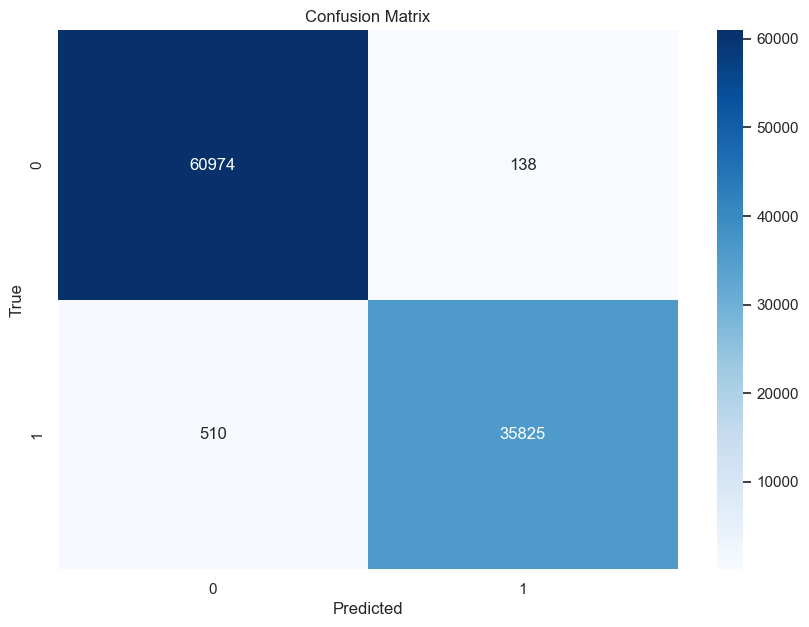

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Find indexes
fp_indices = [i for i, (actual, pred) in enumerate(zip(y_test, y_pred)) if actual == 0 and pred == 1]
fn_indices = [i for i, (actual, pred) in enumerate(zip(y_test, y_pred)) if actual == 1 and pred == 0]



In [56]:
y_test_indices = y_test.index

# Find texts
fp_texts = df.loc[y_test_indices[fp_indices], 'text']
fn_texts = df.loc[y_test_indices[fn_indices], 'text']



In [58]:
# Set the number of examples 
num_examples = 1

fp_examples = fp_texts.head(num_examples).tolist()
fn_examples = fn_texts.head(num_examples).tolist()

# If no example, make it none
fp_examples += ["None"] * (num_examples - len(fp_examples))
fn_examples += ["None"] * (num_examples - len(fn_examples))


In [59]:
# Create dataframe from examples 
errors_df = pd.DataFrame({
    'False Positives (Actually 0, Predicted 1)': fp_examples,
    'False Negatives (Actually 1, Predicted 0)': fn_examples
})

# Print dataframe
errors_df


,"False Positives (Actually 0, Predicted 1)","False Negatives (Actually 1, Predicted 0)"
0,"Taking advantage of opportunities at a young age will significantly impact your future abilities of choosing your correct career path. Furthermore, when you're young, you have more time to research about the career that you are interested in. Mont teenager at a young age choose multiple career of what in Mont interesting and cool looking to them. What'n very important in that the particular person in willing to pursue in that career. At a younger age, Mont children get encouraged by their parents to love a specific subject. Nonetheless, depending on the subject that a teenager liken, that'll Mont likely be the career they pursue. It may also not be the career path they choose since it differ and they grow. When you're at a young age, you tend to gather information quickly, and also learn quicker.\n\nParents make sure that their child not only succeed in life, but also choose the career they believe in Mont fit for their desire. Choosing a career may include loan of pressure and thinking. It'n always bent to talk to your parents for advice, or to peak with your teacher. The parents may sign their child up for activities they think would be identical to their career choice. Mont teen would feel that their parents only wanted them to pursue in a career that they have, or from a family legacy a tradition. Nevertheless, it'n always important to have a young aged teenager opinion about their career path a well.\n\nTeen at a young age tend to become more interested in career more than adult. It'n a fact that a teenager brain consumer\n\n5X\n\nThe information quicker than it would if an adult had. Being freshly exposed to a career at a young age benefit the teenager for future denizen. It'll give the teenager Nome time to think about what career he/the want to get into, and how the/he in going to do it.\n\nWhen there in a young aged teenager, it'n bent that they gather information slowly, and ntepbyntep. For example, YouTube video upon the career, game, and movie. Every young adult would prefer Nome entertainment with a bit of knowledge, and fact being thrown at them. Then activities will satisfy the teenager, and It'll be the introduction to their future career path. Teenager play an important role in today'n generation. It in vital that they should have Nome experience or knowledge upon what career they want to obtain, and become successful in.\n\nHigh school provide plenty of option for young adult, eugenically program and club that they could attend. High schools also provide AP course, which in an advance placement course. Then course will be a bit difficult, but will benefit the (teenager) of whichever career they want to achieve. It'n always necessary for your teenager to top by, and peak to in/her counselor once in a while to check up on in/her garden, and how the'n doing overall.\n\nThe counselor will provide him/her the bent information needed to achieve the teenager goal.\n\nWhen providing option to a young age teenager, it'n bent that you...","The author of ""The Challenge of Exploring Genus"" definitely makes a good point about how studying Genus is nonetheless a worthwhile endeavor despite the obvious perils involved. The author supports this claim by mentioning a few of the many interesting features of Genus that make it such an intriguing planet to explore. For instance, the fact that Genus is the hottest planet in our solar system with surface temperatures hot enough to melt lead is mentioned by the author, as is the fact that Genus is the second brightest object in our sky (after the Sun itself). The author also makes the very good point that Genus is quite similar to Earth in many ways, making it a good candidate for exploration by humans. For example, Genus has a similar size and mass to Earth, as well as a similar gravity. The author also notes that Genus has a very thick atmosphere made up mostly of carbon dioxide, which c

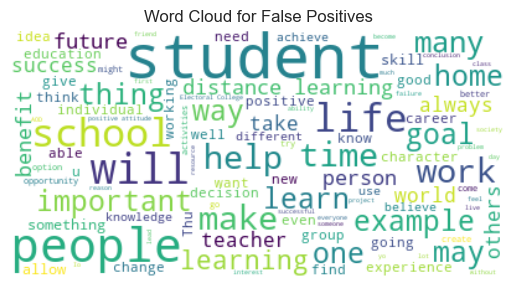

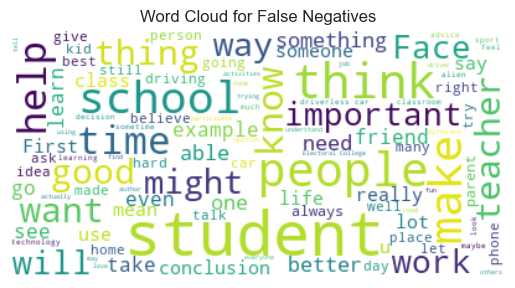

In [60]:
# Merge false positives and false negatives
all_fp_texts = ' '.join(fp_texts)
all_fn_texts = ' '.join(fn_texts)

# Create word cloud 
wordcloud_fp = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_fp_texts)
wordcloud_fn = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_fn_texts)

# Show for False Positives
plt.figure()
plt.imshow(wordcloud_fp, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for False Positives')
plt.show()

# Show for False Negatives
plt.figure()
plt.imshow(wordcloud_fn, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for False Negatives')
plt.show()


In [61]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatize a list of tokens
def lemmatize_text(token_list):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in token_list]

# Apply the lemmatize_text function to the tokenized text
df['lemmatized_text'] = df['tokenized_text'].progress_apply(lemmatize_text)
df[['tokenized_text', 'lemmatized_text']].head()

100%|██████████| 487235/487235 [2:05:30<00:00, 64.70it/s]  


,tokenized_text,lemmatized_text
0,"[cars, cars, around, since, became, famous, henry, ford, created, built, first, modelt, cars, played, major, role, every, day, lives, since, people, starting, question, limiting, car, usage, would, good, thing, limiting, use, cars, might, good, thing, like, matter, article, german, suburb, life, goes, without, cars, elizabeth, rosenthal, states, automobiles, linchpin, suburbs, middle, class, families, either, shanghai, chicago, tend, make, homes, experts, say, huge, impediment, current, efforts, reduce, greenhouse, gas, emissions, tailpipe, passenger, cars, responsible, percent, greenhouse, gas, emissions, europeand, percent, carintensive, areas, united, states, cars, main, reason, greenhouse, gas, emissions, lot, people, driving, around, time, getting, need, go, article, paris, bans, ...]","[car, car, around, since, become, famous, henry, ford, create, built, first, modelt, car, played, major, role, every, day, life, since, people, start, question, limit, car, usage, would, good, thing, limit, use, car, might, good, thing, like, matter, article, german, suburb, life, go, without, car, elizabeth, rosenthal, state, automobile, linchpin, suburb, middle, class, family, either, shanghai, chicago, tend, make, home, expert, say, huge, impediment, current, effort, reduce, greenhouse, gas, emission, tailpipe, passenger, car, responsible, percent, greenhouse, gas, emission, europeand, percent, carintensive, area, united, state, car, main, reason, greenhouse, gas, emission, lot, people, drive, around, time, get, need, go, article, paris, ban, ...]"
1,"[transportation, large, necessity, countries, worldwide, doubt, cars, buses, means, transportation, make, going, place, place, easier, faster, however, theres, always, negative, pollution, although, mobile, transportation, huge, part, daily, lives, endangering, earth, harmful, greenhouse, gases, could, suppressed, small, suburb, community, germany, called, vauban, started, carfree, lifestyle, city, markets, stores, placed, nearby, homes, instead, located, farend, highways, although, vauban, completely, carfree, vauban, families, cars, even, large, families, stated, sold, cars, move, vauban, families, even, said, less, stressed, depending, car, transportation, cars, responsible, greenhouse, gases, even, carintensive, areas, united, states, another, insight, reduced, car, zones, brings, paris, incident, smog, paris, officials, created, system, would, ...]","[transportation, large, necessity, country, worldwide, doubt, car, bus, mean, transportation, make, go, place, place, easy, faster, however, there, always, negative, pollution, although, mobile, transportation, huge, part, daily, life, endanger, earth, harmful, greenhouse, gas, could, suppress, small, suburb, community, germany, call, vauban, start, carfree, lifestyle, city, market, store, place, nearby, home, instead, locate, farend, highway, although, vauban, completely, carfree, vauban, family, car, even, large, family, state, sell, car, move, vauban, family, even, say, less, stress, depend, car, transportation, car, responsible, greenhouse, gas, even, carintensive, area, united, state, another, insight, reduce, car, zone, brings, paris, incident, smog, paris, official, create, system, would, ...]"
2,"[americas, love, affair, vehicles, seems, cooling, says, elisabeth, rosenthal, understand, rosenthals, perspective, easier, suggest, americas, car, usage, decreasing, slowly, necessarily, bad, sense, certain, positive, effects, advantages, limiting, car, usage, includes, increase, security, health, along, decrease, pollution, dependence, firstly, car, usage, limited, security, health, likely, guaranteed, feeling, secure, highly, important, individuals, everywhere, example, many, people, colombia, used, public, transportation, car, free, day, leaving, streets, capital, city, according, andrew, selsky, eerily, devoid, traffic, jams, complications, stem, traffic, jams, end, feeling, confidence, plan, get, p

In [62]:
# Train Word2Vec with lemmatized_text
model = Word2Vec(sentences=df['lemmatized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Vectorize
def document_vector(doc):
    # Filter out words that are not in the model's vocabulary
    doc = [word for word in doc if word in model.wv]
    
    # If no words in the doc are in the vocabulary, return a zero vector
    if not doc:
        return np.zeros(model.vector_size)
    
    # Otherwise, compute the mean vector
    return np.mean([model.wv[word] for word in doc], axis=0)

In [63]:
X = np.array([document_vector(doc) for doc in df['lemmatized_text']])
print(X.shape)

(487235, 100)


In [64]:
y = df['generated'] 

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make prediction on test
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     61112
         1.0       0.99      0.98      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



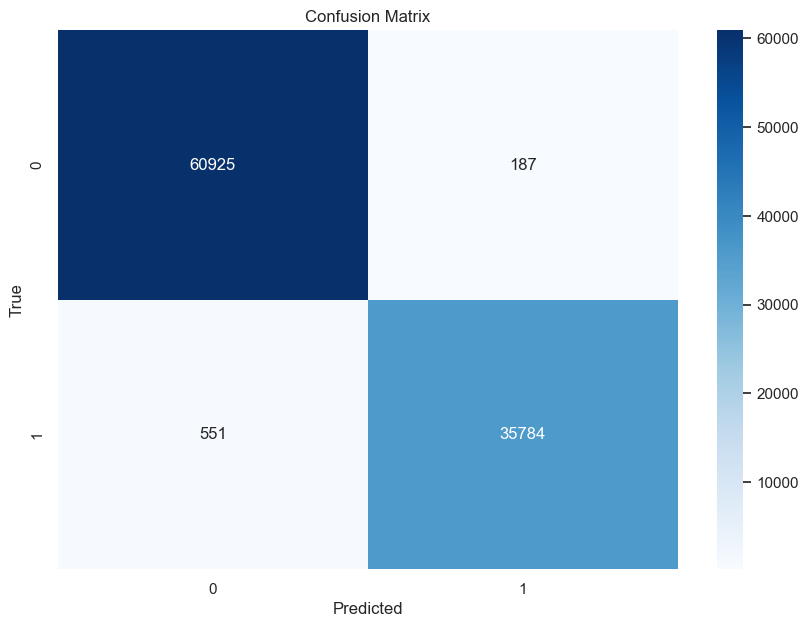

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

After applying lemmatization to our dataset, we observed an increase in both false negatives and false positives, while also significantly extending the processing time, taking approximately two hours. Considering that lemmatization not only added computational overhead but also worsened the model's performance in terms of both false negatives and false positives, we can conclude that it was not a beneficial preprocessing step for this dataset.